# NLP Utilities

In [1]:
from nlp_utils import *

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/felixquinque/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/felixquinque/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
example =   """   
                This is some example text. It has punctuation, 
                some irrelevant text in brackets (here it is) 
                and it includes plenty of stopwords!!!
            """

# process_text processes the text by allowing for punctuation removal, stopword removal, the option to 
# remove text in brackets as well as pos-tagging
processed_text, tags = process_text(example, remove_punctuation=True, remove_stopword=True, 
                                    remove_text_brackets=True)
print(processed_text)
print(tags)

# process_text_to_str does the same as process_text, but instead of returning a nested list of sentences
# and words, it returns the cleaned string
processed_string = process_text_to_str(example, remove_punctuation=True, remove_stopword=True, 
                                       remove_text_brackets=True)
print(processed_string)

[['This', 'example', 'text'], ['It', 'punctuation', 'irrelevant', 'text', 'brackets', 'includes', 'plenty', 'stopwords']]
[[('This', 'DT'), ('example', 'NN'), ('text', 'NN')], [('It', 'PRP'), ('punctuation', 'NN'), ('irrelevant', 'JJ'), ('text', 'NN'), ('brackets', 'NNS'), ('includes', 'VBZ'), ('plenty', 'NN'), ('stopwords', 'NNS')]]
This example text It punctuation irrelevant text brackets includes plenty stopwords


# Classification Utilities

In [3]:
import xgboost
import sklearn
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import classification_metrics

In [4]:
mnist = load_digits()
X = mnist['data']
y = mnist["target"]
X_train, X_test, y_train, y_test  = train_test_split(X,y)

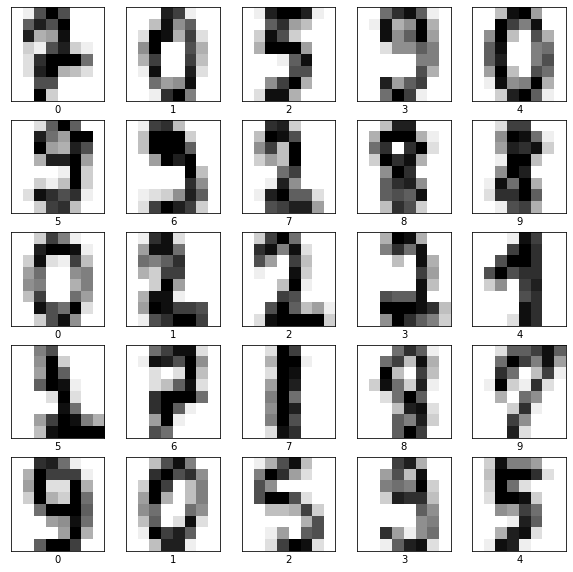

In [5]:
X_train = X_train / np.max(X_train)
X_test = X_test / np.max(X_test)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(8,8), cmap=plt.cm.binary)
    plt.xlabel(y[i])
plt.show()



In [6]:
# # create models
xgbc = xgboost.XGBClassifier()
xgbc2 = xgboost.XGBClassifier(n_estimators=10, min_child_weight=1)
xgbc3 = xgboost.XGBClassifier(n_estimators=500, alpha=0.1)

# train models
xgbc.fit(X_train,y_train, verbose=0)
xgbc2.fit(X_train,y_train, verbose=0)
xgbc3.fit(X_train,y_train, verbose=0)

predict_probs = xgbc.predict_proba(X_test)
predict_probs2 = xgbc2.predict_proba(X_test)
predict_probs3 = xgbc3.predict_proba(X_test)

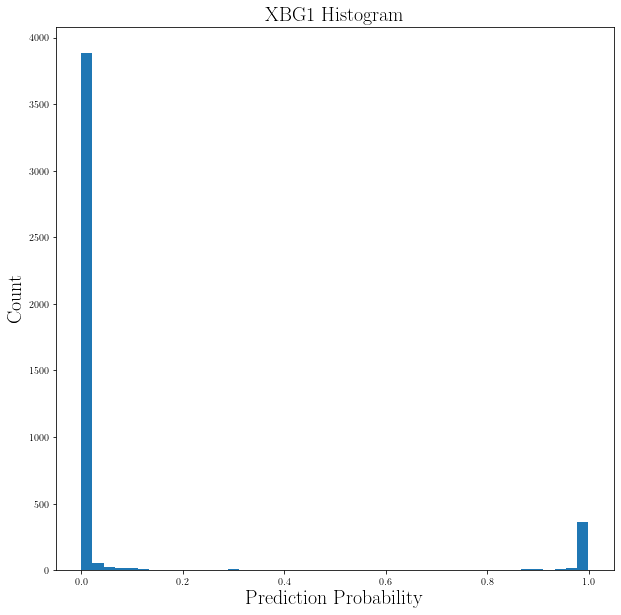

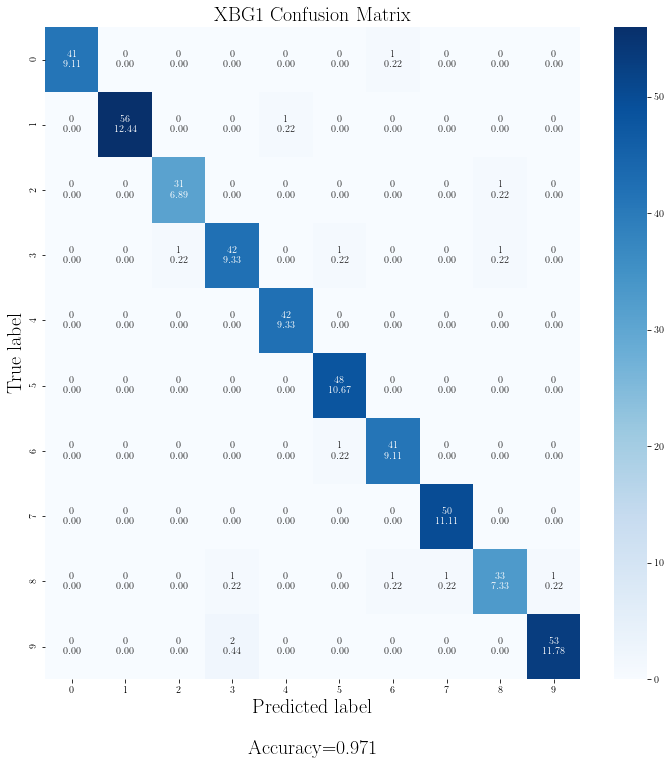

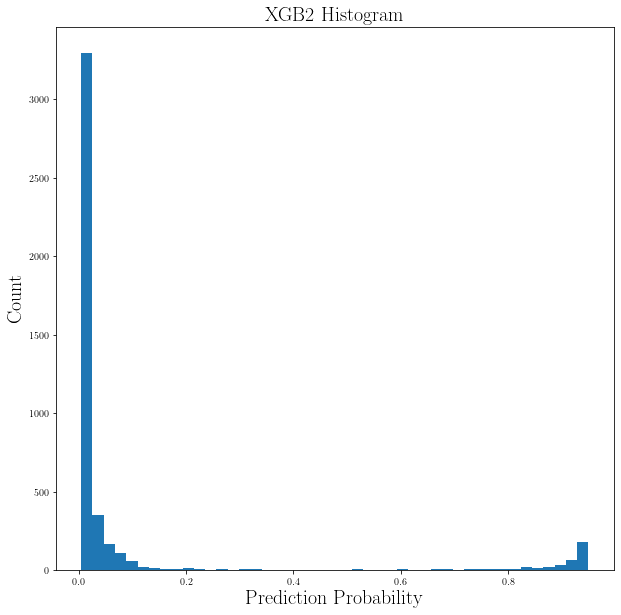

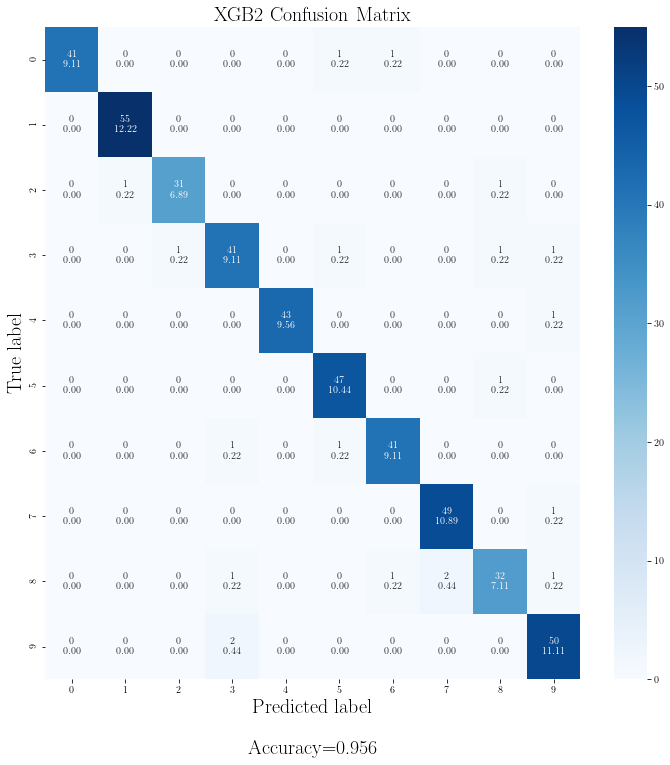

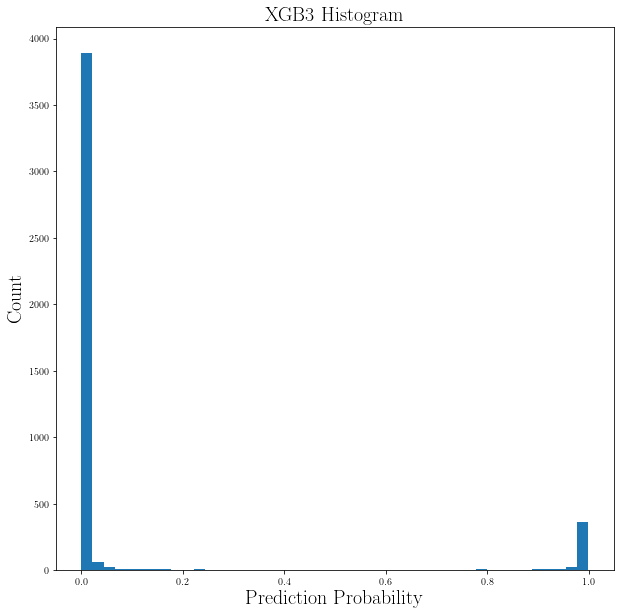

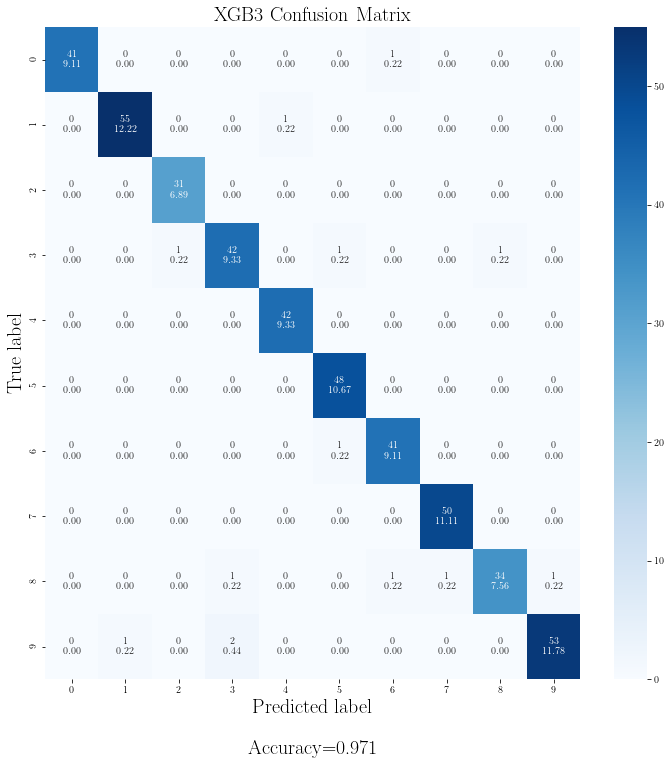

,Quantity,XBG1,XGB2,XGB3
0,Accuracy,0.971,0.956,0.971
1,ROC AUC Macro Average,0.999,0.998,0.999
2,ROC AUC Micro Average,0.999,0.998,0.999
3,F1-Score Macro Average,0.969,0.954,0.971
4,F1-Score Micro Average,0.971,0.956,0.971
5,ROC AUC 0 vs Rest,1.000,1.000,1.000
6,ROC AUC 1 vs Rest,1.000,1.000,1.000
7,ROC AUC 2 vs Rest,1.000,1.000,1.000
8,ROC AUC 3 vs Rest,0.999,0.997,0.999
9,ROC AUC 4 vs Rest,1.000,1.000,1.000


Loading BokehJS ...

In [12]:
classification_metrics.get_metrics(y_test, 
                                   [predict_probs, predict_probs2, predict_probs3],
                                   model_names=["XBG1", "XGB2", "XGB3"],
                                   class_names=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])